##**APRENDIZAJE NO SUPERVISADO**

> **Proyecto No. 3**


*Juan Felipe Yepes*

*Jennifer Paola Sanchez*

*Linda Camila Castañeda*

###**Descripción de la Base de Datos**

La base de datos fue extraida de *Kaggle* y recopila datos del nivel de educación en 65 países del mundo para el año 2014, con el fin de analizar el nivel de escolaridad de la población según indicadores como el ciclo de primaria, el porcentaje de alumnos que repiten la primaria, los que inician el ciclo y los que continúan, la población desocupada, el PIB, la esperanza de vida al nacer y, al mismo tiempo, la población total. 
    
**VARIABLES**

En total contamos con 9 variables, de las cuales 4 corresponden a indicadores macroeconomicos o demográficos de cada país y las demás 5 se refieren a indicadores de escolaridad como la repitencia, duración de los niveles de estudio y los ciclos académicos. 

**1.**  Población total

**2.**  PIB

**3.**  Porcentaje de repetidores en Educación Primaria

**4.**  Niños no escolarizados de primaria

**5.**  Matrículas en Educación Secundaria

**6.**  Matrículas en Educación Primaria

**7.**  Número de Desempleados

**8.**  Esperanza de vida al Nacer

**9.**  Duración teórica de la educación primaria


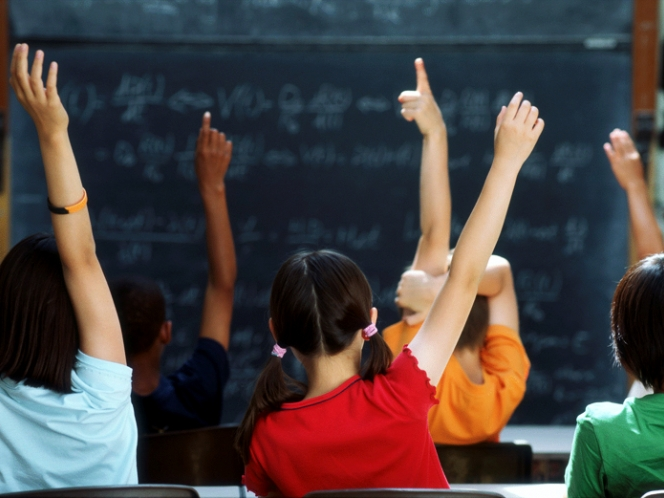

###**Librerias**

In [ ]:
install.packages('readxl')
install.packages('corrplot')
install.packages('FactoMineR')
install.packages('factoextra')
install.packages('cluster')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggrepel’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘viridis’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘dendextend’, ‘ggpubr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(cluster)


corrplot 0.90 loaded

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



###**Exploración y Transformación de los datos**

In [ ]:
educationdata = data.frame(read_xlsx('/content/Education_Countries.xlsx')); print(head(educationdata))

        Country.Name Population         GDP Repeaters.in.Primary Out.of.School
1            Germany   80982500 3.87928e+17                 0.41          4282
2 Russian Federation  143819569 2.05281e+17                 0.38        220011
3              Spain   46480882 1.38134e+17                 2.32         28642
4             Mexico  125385833 1.29818e+17                 0.82        340062
5          Indonesia  254454778 8.90487e+16                 2.21       2008214
6       Saudi Arabia   30886545 7.53832e+16                 0.96        120782
  Enrolment.in.Secondary Enrolment.in.Primary Unemployment
1                7201072              2862690            5
2                9061324              5725528          5.1
3                3288424              2960626         24.7
4               12993322             14627368          4.9
5               22586956             29838440          6.2
6                3419441              3737083          5.6
  Life.Expectancy.at.Birth Duratio

In [ ]:
rownames(educationdata) = unclass(educationdata$Country.Name); print(head(educationdata))

                         Country.Name Population         GDP
Germany                       Germany   80982500 3.87928e+17
Russian Federation Russian Federation  143819569 2.05281e+17
Spain                           Spain   46480882 1.38134e+17
Mexico                         Mexico  125385833 1.29818e+17
Indonesia                   Indonesia  254454778 8.90487e+16
Saudi Arabia             Saudi Arabia   30886545 7.53832e+16
                   Repeaters.in.Primary Out.of.School Enrolment.in.Secondary
Germany                            0.41          4282                7201072
Russian Federation                 0.38        220011                9061324
Spain                              2.32         28642                3288424
Mexico                             0.82        340062               12993322
Indonesia                          2.21       2008214               22586956
Saudi Arabia                       0.96        120782                3419441
                   Enrolment.in.Pr

In [ ]:
summary(educationdata)

   Population             GDP            Repeaters.in.Primary Out.of.School    
 Min.   :   351706   Min.   :1.399e+09   Length:64            Min.   :    397  
 1st Qu.:  4237806   1st Qu.:1.267e+10   Class :character     1st Qu.:   4205  
 Median :  9509040   Median :4.985e+10   Mode  :character     Median :  26458  
 Mean   : 24926960   Mean   :2.467e+16                        Mean   : 264267  
 3rd Qu.: 22311084   3rd Qu.:2.622e+16                        3rd Qu.: 182502  
 Max.   :254454778   Max.   :3.879e+17                        Max.   :5611792  
 Enrolment.in.Secondary Enrolment.in.Primary Unemployment      
 Min.   :   30230       Min.   :   24072     Length:64         
 1st Qu.:  361090       1st Qu.:  278276     Class :character  
 Median :  649528       Median :  775306     Mode  :character  
 Mean   : 1960268       Mean   : 2467449                       
 3rd Qu.: 1715606       3rd Qu.: 2661190                       
 Max.   :22586956       Max.   :29838440                

El país con menor población es Belice con 351,706 habitantes, y el país con el mayor índice demográfico es Indonesia con 254,454,778 habitantes. La media de la población de los 65 países es de 649,528 habitantes, lo cual indica que la mayoría de países de la base de datos cuentan con una cantidad de habitantes baja. 

Los países de mayor PIB corresponden al continente europeo y asíatico, mientras los de menor renta son países africanos. 


In [ ]:
educationdata = educationdata[, -c(1)]; print(head(educationdata))

                   Population         GDP Repeaters.in.Primary Out.of.School
Germany              80982500 3.87928e+17                 0.41          4282
Russian Federation  143819569 2.05281e+17                 0.38        220011
Spain                46480882 1.38134e+17                 2.32         28642
Mexico              125385833 1.29818e+17                 0.82        340062
Indonesia           254454778 8.90487e+16                 2.21       2008214
Saudi Arabia         30886545 7.53832e+16                 0.96        120782
                   Enrolment.in.Secondary Enrolment.in.Primary Unemployment
Germany                           7201072              2862690            5
Russian Federation                9061324              5725528          5.1
Spain                             3288424              2960626         24.7
Mexico                           12993322             14627368          4.9
Indonesia                        22586956             29838440          6.2
Saudi

In [ ]:
print(sapply(educationdata, class))

                   Population                           GDP 
                    "numeric"                     "numeric" 
         Repeaters.in.Primary                 Out.of.School 
                  "character"                     "numeric" 
       Enrolment.in.Secondary          Enrolment.in.Primary 
                    "numeric"                     "numeric" 
                 Unemployment      Life.Expectancy.at.Birth 
                  "character"                   "character" 
Duration.of.Primary.Education 
                    "numeric" 


Todas las variables son númericas a excepción del nombre de los paises. Sin embargo, hay 3 de ellas que se clasifican como caracteres; por lo que es necesario convertirlas a variables númericas.

In [ ]:
educationdata$Repeaters.in.Primary = as.numeric(educationdata$Repeaters.in.Primary)
educationdata$Unemployment = as.numeric(educationdata$Unemployment)
educationdata$Life.Expectancy.at.Birth = as.numeric(educationdata$Life.Expectancy.at.Birth)

In [ ]:
print(head(educationdata))

                   Population         GDP Repeaters.in.Primary Out.of.School
Germany              80982500 3.87928e+17                 0.41          4282
Russian Federation  143819569 2.05281e+17                 0.38        220011
Spain                46480882 1.38134e+17                 2.32         28642
Mexico              125385833 1.29818e+17                 0.82        340062
Indonesia           254454778 8.90487e+16                 2.21       2008214
Saudi Arabia         30886545 7.53832e+16                 0.96        120782
                   Enrolment.in.Secondary Enrolment.in.Primary Unemployment
Germany                           7201072              2862690          5.0
Russian Federation                9061324              5725528          5.1
Spain                             3288424              2960626         24.7
Mexico                           12993322             14627368          4.9
Indonesia                        22586956             29838440          6.2
Saudi

In [ ]:
print(sapply(educationdata, class))

                   Population                           GDP 
                    "numeric"                     "numeric" 
         Repeaters.in.Primary                 Out.of.School 
                    "numeric"                     "numeric" 
       Enrolment.in.Secondary          Enrolment.in.Primary 
                    "numeric"                     "numeric" 
                 Unemployment      Life.Expectancy.at.Birth 
                    "numeric"                     "numeric" 
Duration.of.Primary.Education 
                    "numeric" 


##**Análisis de Correlaciones**

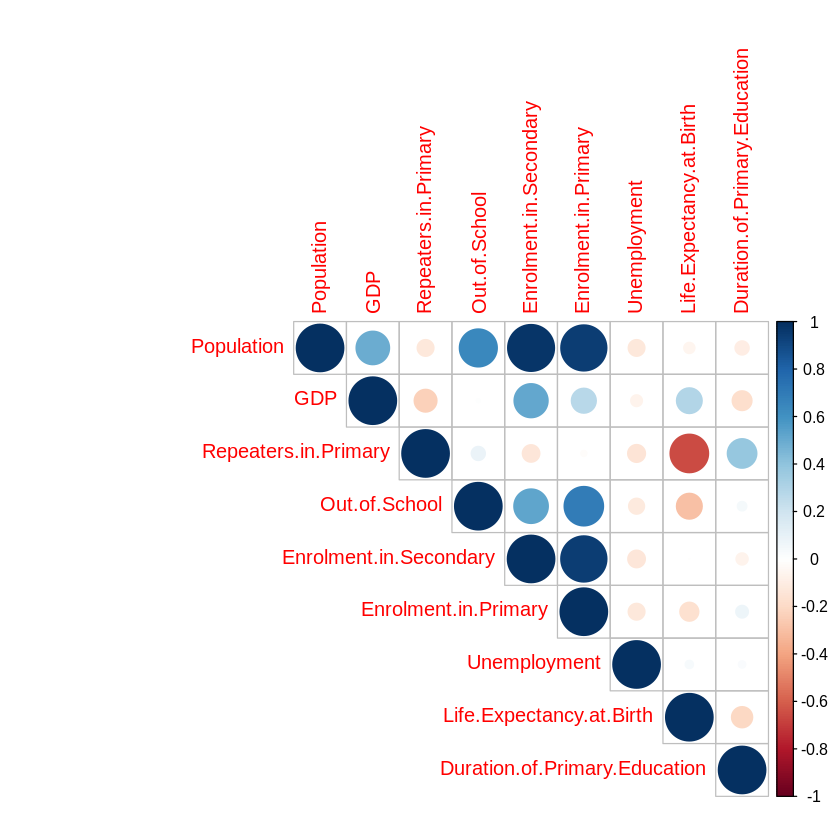

In [ ]:
corrplot(cor(educationdata), type="upper")

In [ ]:
round(cor(educationdata),2)

,Population,GDP,Repeaters.in.Primary,Out.of.School,Enrolment.in.Secondary,Enrolment.in.Primary,Unemployment,Life.Expectancy.at.Birth,Duration.of.Primary.Education
Population,1.00,0.50,-0.13,0.64,0.97,0.94,-0.13,-0.06,-0.09
GDP,0.50,1.00,-0.23,0.01,0.52,0.28,-0.06,0.30,-0.18
Repeaters.in.Primary,-0.13,-0.23,1.00,0.09,-0.14,-0.02,-0.14,-0.66,0.39
Out.of.School,0.64,0.01,0.09,1.00,0.53,0.69,-0.11,-0.30,0.04
Enrolment.in.Secondary,0.97,0.52,-0.14,0.53,1.00,0.94,-0.14,0.00,-0.07
Enrolment.in.Primary,0.94,0.28,-0.02,0.69,0.94,1.00,-0.13,-0.16,0.07
Unemployment,-0.13,-0.06,-0.14,-0.11,-0.14,-0.13,1.00,0.03,0.03
Life.Expectancy.at.Birth,-0.06,0.30,-0.66,-0.30,0.00,-0.16,0.03,1.00,-0.20
Duration.of.Primary.Education,-0.09,-0.18,0.39,0.04,-0.07,0.07,0.03,-0.20,1.00


*Este diagrama se puede analizar en torno a cinco grupos:*

**RELACIONES DIRECTAS**: Ante el comportamiento de la primer variable (aumento o disminución), se generará el mismo comportamiento en la segunda. 
*   La alta correlación que es evidente entre población total y los tres indicadores de escolaridad (Repitentes y Matriculados en Educación Primaria-Secundaria) por tener un indice mayor al 0.8
*   Una correlación media-alta entre variables como Población total - PIB y PIB - Matriculas (sea en educación primaria o secundaria), relaciones que se situan entre el rango de 0.5 a 0.7
*   Una correlación baja entre 0 y 0.4 en variables como PIB-Repitencia, PIB-Esperanza de vida y Repitencia-Duración teórica.

**RELACIONES INVERSAS**: La segunda variable demostrará el comportamiento contrario de lo que se visualice de la primera (aumento o disminución).
*   Situados entre -0.6 a 0, para este grupo encontramos una variedad de relaciones negativas, entre ellas la mayoría de desempleo y duración teórica de la educación primaria.
*   Situados entre -1 a -0.6 que corresponde a una correlación negativa más fuerte donde encontramos una única relación entre Repitencia y Expectativa de vida al nacer.

 

###**Análisis de Componentes Principales (PCA)**
1. Realizar la estandarización de las variables
2. Calcular la matriz de correlaciones
3. Calcular los valores y vectores propios de la matriz de correlaciones
4. Establecer las coordenadas
5. Establecer las contribuciones de cada una de las variables del conjunto de datos, a cada componente principal

**ESTANDARIZACIÓN DE VARIABLES**

In [ ]:
educationdata_est = scale(educationdata)

A las variables que maneajamos en la base de datos se les realiza una transformación de escala de la distribución con el fin de realizar comparaciones dado que todas las variables estarán expresadas en la misma unidad de medida (estadisticamente, en conteo de desviaciones estandár).

**MATRIZ DE CORRELACIONES**

In [ ]:
correlacion_educ = cor(educationdata_est); print(round(correlacion_educ, 2))

                              Population   GDP Repeaters.in.Primary
Population                          1.00  0.50                -0.13
GDP                                 0.50  1.00                -0.23
Repeaters.in.Primary               -0.13 -0.23                 1.00
Out.of.School                       0.64  0.01                 0.09
Enrolment.in.Secondary              0.97  0.52                -0.14
Enrolment.in.Primary                0.94  0.28                -0.02
Unemployment                       -0.13 -0.06                -0.14
Life.Expectancy.at.Birth           -0.06  0.30                -0.66
Duration.of.Primary.Education      -0.09 -0.18                 0.39
                              Out.of.School Enrolment.in.Secondary
Population                             0.64                   0.97
GDP                                    0.01                   0.52
Repeaters.in.Primary                   0.09                  -0.14
Out.of.School                          1.00         

Con las variables ya estandarizadas, podemos observar tres tipos de comportamientos en torno a las correlaciones entre variables:


*   ***Relaciones directas:*** Entre población y los indicadores de matricula porque es evidente que entre mayor sea el número de habitantes en una economía, la inmersión a la educación seguirá la misma tendencia. A su vez, encontramos la relación mayor al 0.90 entre los tipos de matricula ya que si los individuos inician su ciclo de primaria, seguramente continuen con la secundaria.
*   ***Relaciones inversas:***  Con un rango entre -0.20 y -0.60 dos por destacar es la relación entre expectativa de vida y repitentes de primaria al igual que con la duración teorica de este ciclo, es decir si la expectativa de un individuo es vivir más años, la probabilidad de ocurrencia de que repitiera un curso de primaria seria mínima y por lo tanto la duración de terminar el ciclo de primaria será menor.
*   ***Relaciones intermedias:***En este grupo de correlaciones no es tan evidente el comportamiento. Por lo que relaciones como el PIB con la población, los niños no escolarizados con la población y el PIB con los indicadores de matriculas se siruan en un rango de 0.50 a 0.60 pero no resultan tan intuitivas sus predicciones.



**EIGEN VALORES Y EIGEN VECTORES**

In [ ]:
res.pca = FactoMineR::PCA(educationdata, scale.unit = TRUE, graph = F); print(res.pca$eig)

       eigenvalue percentage of variance cumulative percentage of variance
comp 1 3.61643187            40.18257628                          40.18258
comp 2 2.11874506            23.54161174                          63.72419
comp 3 1.00376545            11.15294941                          74.87714
comp 4 0.89070884             9.89676488                          84.77390
comp 5 0.73655556             8.18395066                          92.95785
comp 6 0.34910442             3.87893805                          96.83679
comp 7 0.25605271             2.84503010                          99.68182
comp 8 0.02216679             0.24629765                          99.92812
comp 9 0.00646931             0.07188123                         100.00000


Para este apartado de la construcción de los componentes, no se visualiza el comportamiento usual de los análisis de PCA donde con sólo contar con las dos primeras componentes ya se puede explicar  hasta el 90% de la varianza total de las variables que se estén estudiando. Lo que podemos evidenciar son 3 puntos principalmente:


**1.**  El porcentaje de varianza explicado de la primera componente es el de mayor significancia con un 40%, luego en la segunda componente se cuenta con la mitad de representatividad que la primera (23.5%) y estas en conjunto suman un 63.7%.

**2.**   Los dos siguientes componentes (tercera y cuarta) cuentan con un peso similar de 9.8% y 8.1% respectivamente. Finalmente, las últimas 5 no son de gran significancia al contar con una representación menor al 3%.

**3.**  Hasta la componente 5 se evidencia la mayoria del porcentaje acumulado de la varianza explicada  con aproximadamente un 93% del total.



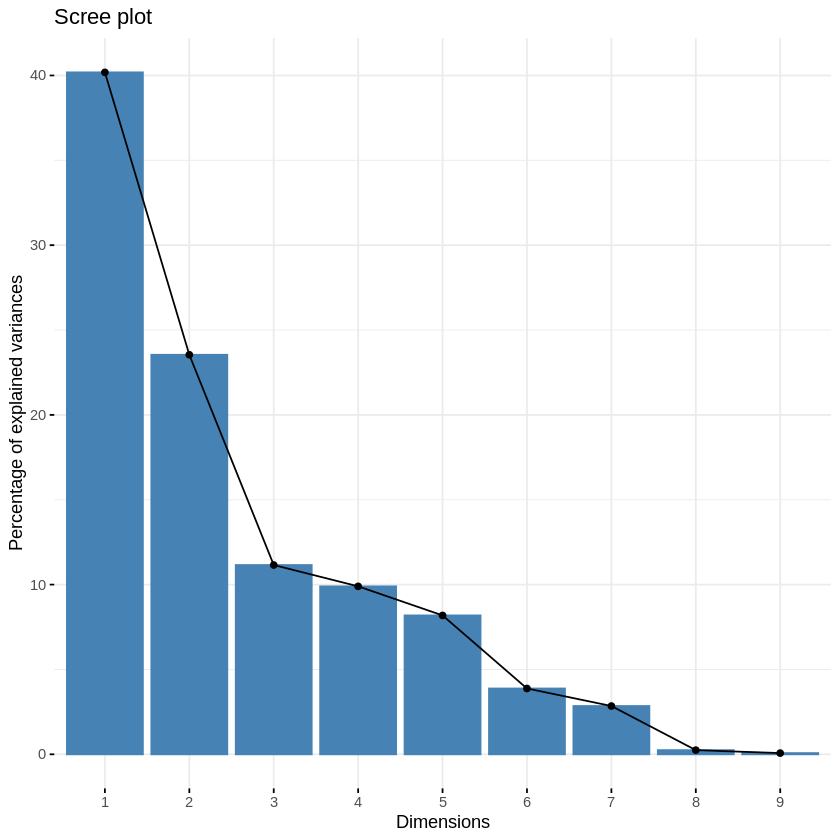

In [ ]:
factoextra::fviz_screeplot(res.pca, ncp = 10)

En la anterior gráfica se visualiza un primer codo del tercer al cuarto componente, con lo cual se puede inferir que hasta ese punto se deberia realizar el análisis teniendo en cuenta el porcentaje acumulado de varianza. Sin embargo, el codo más representativo se evidencia del componente quinto al sexto, por lo cual para los análisis posteriores se toma hasta el quinto componente por la razón principal de que toma la mayoría de la explicación de la varianza de las variables en estudio, algunas de ellas altamanete correlacionadas. 

**COORDENADAS**

In [ ]:
print(res.pca$var$coord)

                                    Dim.1       Dim.2       Dim.3        Dim.4
Population                     0.98764689 -0.03871232  0.04292288  0.008991502
GDP                            0.49241900 -0.48777478 -0.16815414  0.433836781
Repeaters.in.Primary          -0.10525800  0.84047304 -0.17241281  0.161854923
Out.of.School                  0.70291679  0.35332855  0.12635571 -0.328593564
Enrolment.in.Secondary         0.96848537 -0.08145480  0.01750723  0.091671590
Enrolment.in.Primary           0.95480026  0.15292310  0.10309514  0.004062235
Unemployment                  -0.18339477 -0.13043468  0.93908304  0.016562291
Life.Expectancy.at.Birth      -0.07573692 -0.83864694 -0.03257688  0.224527721
Duration.of.Primary.Education -0.06603463  0.54564084  0.18461312  0.713537458
                                    Dim.5
Population                     0.04139148
GDP                            0.46980358
Repeaters.in.Primary           0.33116412
Out.of.School                 -0.24800465


En este apartado de coordenadas se observa la *afectación* de cada variable tomada en el estudio para cada dimensión que cuenta con su particularidad. 


> Comenzando con la primera componente, es evidente que la población total tiene una afectación positiva muy significativa con el 0.98 al igual que la matricula a la educación secundaria con 0.96. Sin embargo, las últimas dos variables referentes a expectativa de vida y duración teórica de la primaria tienen una relación inversa y de muy poca significancia.

> En el caso de la segunda componente, aunque no es tan fuerte la afectación como en la anterior, se cuenta con dos variables representantes que corresponden a repitentes de primaria con una relación positiva de 0.84 y expectativa de vida al nacer con un puntaje similar pero con una relación contraria (negativa) de -0.83

> Para la cuarta y quinta componente se cuenta con afectaciones que no sobrepasan el rango entre -0.50 a 0.50 y por lo tanto, pueden ser catalogadas como afectaciones intermedias e implicitas dado que no son tan evidentes para interpretar.



**CONTRIBUCIONES**

In [ ]:
print(res.pca$var$contrib)

                                   Dim.1       Dim.2       Dim.3        Dim.4
Population                    26.9726190  0.07073262  0.18354627  0.009076716
GDP                            6.7048537 11.22948871  2.81697419 21.130850447
Repeaters.in.Primary           0.3063585 33.34025163  2.96146659  2.941142482
Out.of.School                 13.6624174  5.89221752  1.59058732 12.122225043
Enrolment.in.Secondary        25.9361698  0.31315164  0.03053533  0.943482327
Enrolment.in.Primary          25.2083705  1.10374176  1.05887358  0.001852654
Unemployment                   0.9300228  0.80298508 87.85687431  0.030796762
Life.Expectancy.at.Birth       0.1586116 33.19553165  0.10572719  5.659840239
Duration.of.Primary.Education  0.1205767 14.05189939  3.39541523 57.160733330
                                   Dim.5
Population                     0.2326036
GDP                           29.9658861
Repeaters.in.Primary          14.8895322
Out.of.School                  8.3505319
Enrolment.in.Se

Para este apartado de contribuciones se observa la *representatividad* de cada variable tomada en el estudio para cada dimensión que cuenta con su particularidad. 

> Para la componente 1 hay tres variables que estan muy parejas sobre un 25% y que corresponden a la población total y los dos tipos de matricula (ciclo primario - ciclo secundaria).

> Para la componente 2, ocurre algo similar al anterior caso dado que repitentes de primaria y expectativa de vida cuentan con una representatividad del 33% y al contrario de la primera, las que menos aportan son la matricula de educación primaria y la población total.

> Finalmente para los componentes 3 y 4 si existe una variable con una representatividad alta: desempleo con 87.8% y duración teórica de primaria con  un 57.1%.






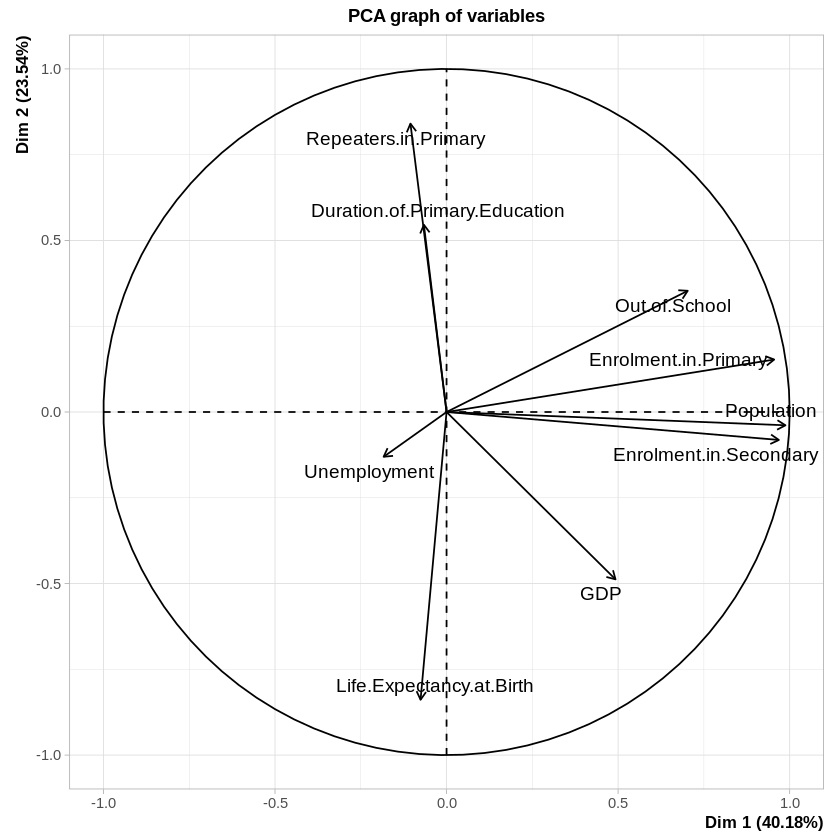

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(1, 2), choix = "var") 

Respecto a la gráfica PCA de las variables, se puede observar que existe una fuerte asociación entre la población y algunas variables de educación (“out of school”, “enrolment in primary”, “enrolment in secundary”). Esto tiene sentido ya que, a mayor población, se espera que exista una mayor cantidad de niños inmersos en educación primaria y secundaria, así como también niños que no pueden acceder a dicha educación. Todas estas variables tienen una fuerte asociación al componente 1, que representa aproximadamente el 40% de la varianza original. 

Por otra parte, las variables “repeaters in primary” y “duration of primary education” tienen una gran correlación entre sí, y están fuertemente asociadas al componente 2 que explica aproximadamente el 24% de la varianza original. La relación entre estas dos variables tiene sentido, ya que se espera que, a mayor cantidad de repitentes en primaria al interior de un país, mayor duración de dicha educación. No obstante, hay que tener en cuenta que la segunda variable mencionada es teórica, mientras que la de repitentes es real, o más bien, más palpable, por lo cual se debería recurrir a otros métodos o análisis para corroborar dicha relación. 

Por último, se encuentra que las variables “gdp” y “life expectancy at birth” están fuertemente asociadas al componente 1, y sin embargo no están aisladas de otras variables. Así mismo, “unemployment” esta también aislada y cerca al origen, por lo cual su comportamiento no esta asociado a ninguno de los componentes. 

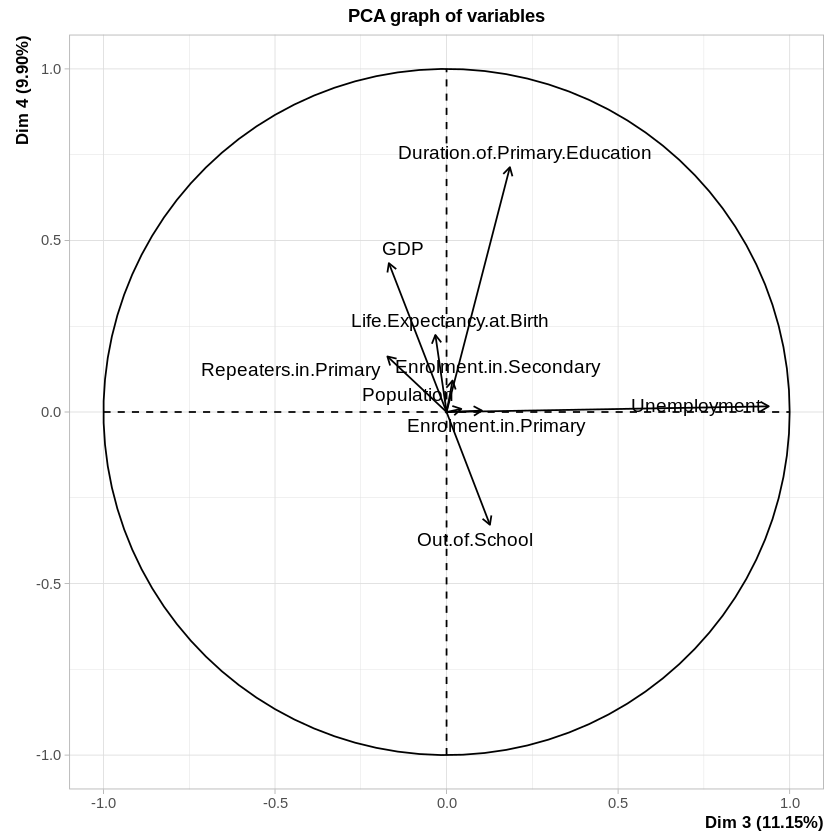

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(3, 4), choix = "var") 

Realizando la misma gráfica que en el apartado anterior, pero a partir de los componentes 3 y 4, se obtiene un análisis que no contribuye mucho al entendimiento de las variables y los componentes. Esto sucede, principalmente, por que los componentes 3 y 4 no explican en gran medida la varianza original (la suma de ambos da alrededor del 21%, mientras que solo el componente 2 explica alrededor del 24%), lo cual genera que las variables estén sumamente concentradas hacia el origen, y su comportamiento no pueda ser explicado por alguno de los componentes, o de las relaciones con otras variables. 

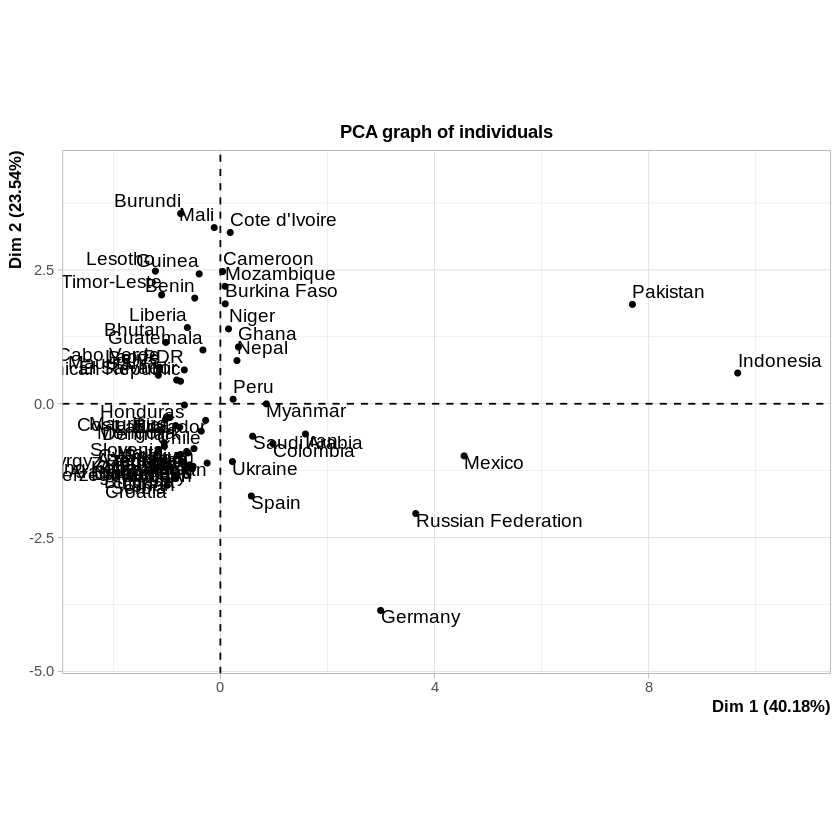

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(1, 2), choix = "ind")

Respecto al análisis de la gráfica PCA de los individuos, se pueden inferir algunos aspectos fundamentales: el primero es que existe una fuerte concentración de individuos (países) hacia el componente 2, que explica el 23,54% de la varianza original, y en segundo lugar, que existe una serie de países apartados que encuentran una mayor asociación con el componente 1, que explica el 40,18% de la varianza original. A priori, podría pensarse que los países que están aislados hacia la derecha están fuertemente relacionados con el PIB, ya que en la base de datos son estos (Alemania, España, Rusia, México, entre otros) los que mayor producción tienen comparativamente con otros países. Por supuesto, pueden generarse más análisis a partir de los individuos y las variables a partir de los biplots, que serán expuestos más adelante. 

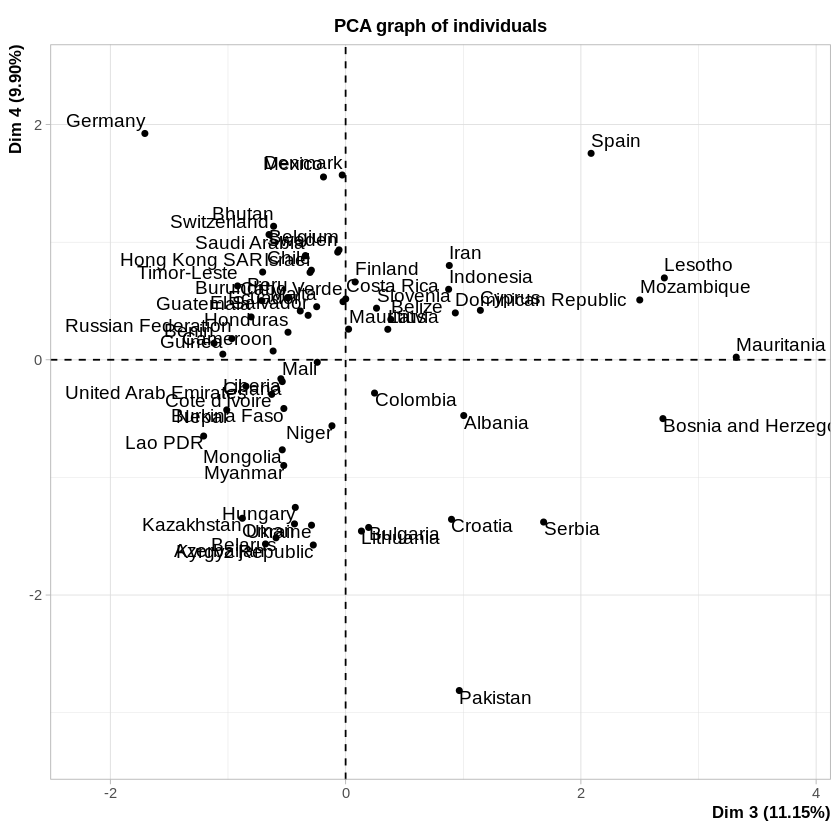

In [ ]:
FactoMineR::plot.PCA(res.pca, axes = c(3, 4), choix = "ind")

A diferencia de la gráfica expuesta con anterioridad, cuando se realiza la gráfica PCA de los individuos a partir de los componentes 3 y 4, no se encuentran posibles relaciones entre países y componentes o entre grupos de países y componentes. Esto se debe, particularmente, a que los componentes 3 y 4 no explican en gran medida la varianza original, por lo cual un análisis exhaustivo sobre la misma no es de mucha utilidad. 

Warning message:
“ggrepel: 31 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


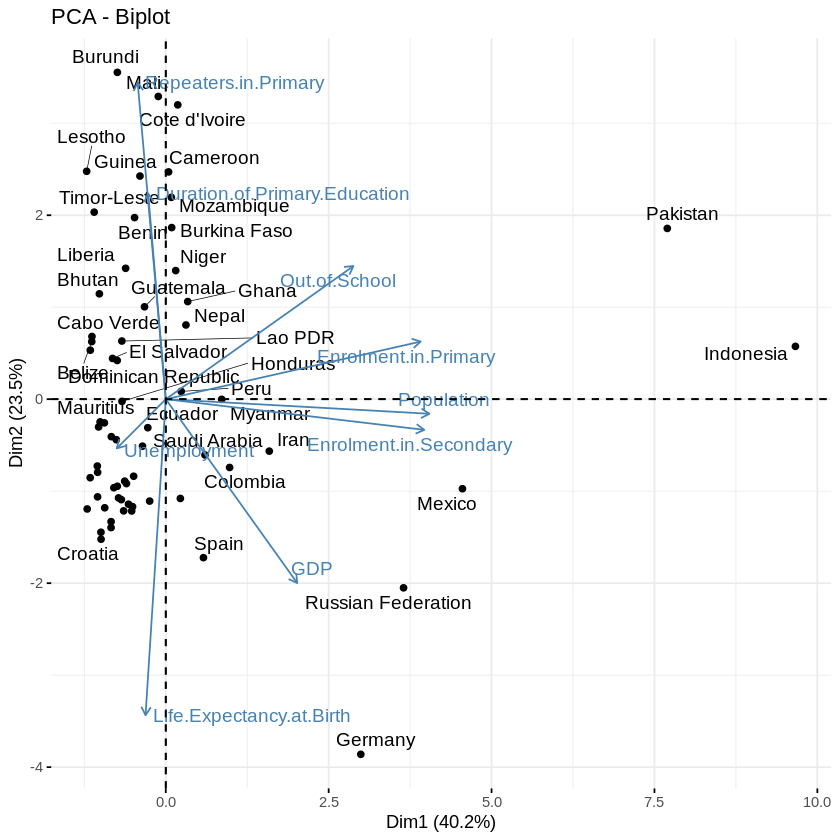

In [ ]:
factoextra::fviz_pca_biplot(res.pca, axes = c(1, 2), repel = TRUE)

A partir del anterior biplot entre individuos (países), variables y los componentes principales 1 y 2, se pueden extraer las siguientes conclusiones: 
En primera medida, efectivamente los países que encuentran una mayor asociación con el componente 1, que explica la varianza original en un 40,2%, cuentan con un PIB bastante alto en relación a los demás países de la base de datos (Alemania, Rusia, México, España, etc.). De la misma manera, países como Indonesia y Pakistán están fuertemente asociados con la variable población, lo cual es certero si se revisa la gran cantidad de población que tienen ambos países. 

Ahora bien, respecto a la educación es posible ver que existe un cumulo importante de países que se encuentran en dirección opuesta a la mayoría de índices educativos. Por ejemplo, en la parte izquierda de la gráfica, con una mayor propensión hacia el componente 2, que explica el 23,5% de la varianza original, se encuentra una gran cantidad de países africanos y centroamericanos que van en contravía a indicadores como “enrolment in primary” y “enrolment in secundary” (Guatemala, Belice, Liberia, Bután, etc.), así como casos atípicos o contraintuitivos como el de Croacia. De la misma forma, existe algunos países como Burundi, Costa de Marfil o Lesoto, que se encuentran fuertemente relacionados con “repeaters in primary”. 


Warning message:
“ggrepel: 8 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


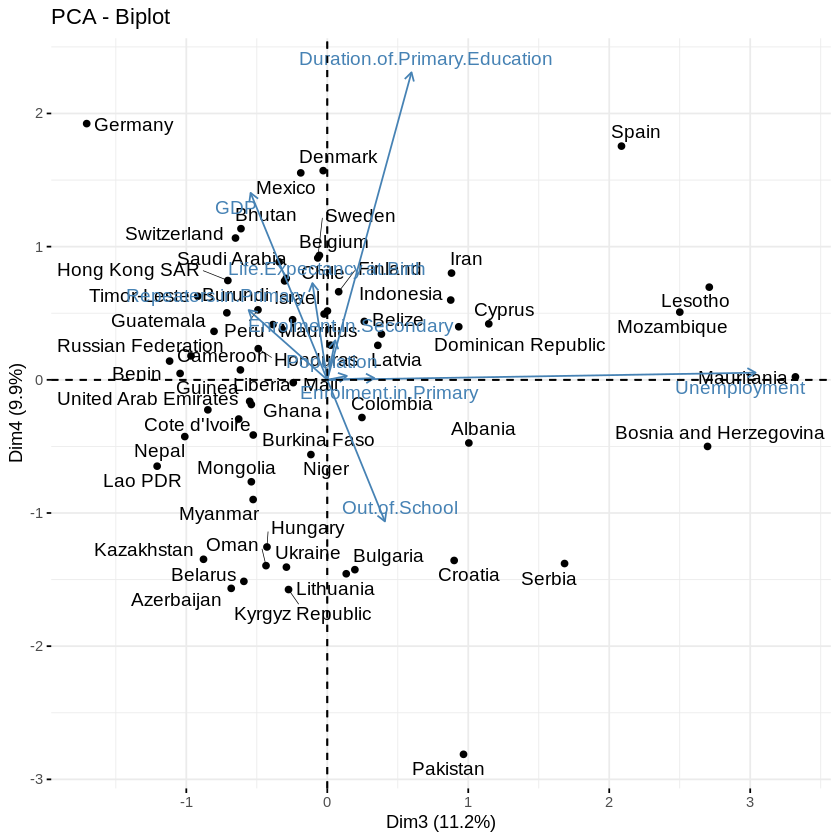

In [ ]:
factoextra::fviz_pca_biplot(res.pca, axes = c(3, 4), repel = TRUE)

De la misma forma en que sucedía con las gráficas PCA de individuos y variables, se encuentra que en este biplot de variables e individuos (países) a partir de los componentes 3 y 4, no existen unas relaciones evidentes entre países, regiones, grupos de países, variables y componentes principales. Esto puede deberse, fundamentalmente, a que los componentes anteriormente mencionados no representan en gran medida la varianza original, por lo cual no realizan agrupamientos propicios para análisis de aprendizaje no supervisado.   

###**Clusters**

**K-MEDIAS**

*   Silueta: tiene el objetivo de maximizar la distancia entre grupos, y minimizar la distancia entre individuos. 

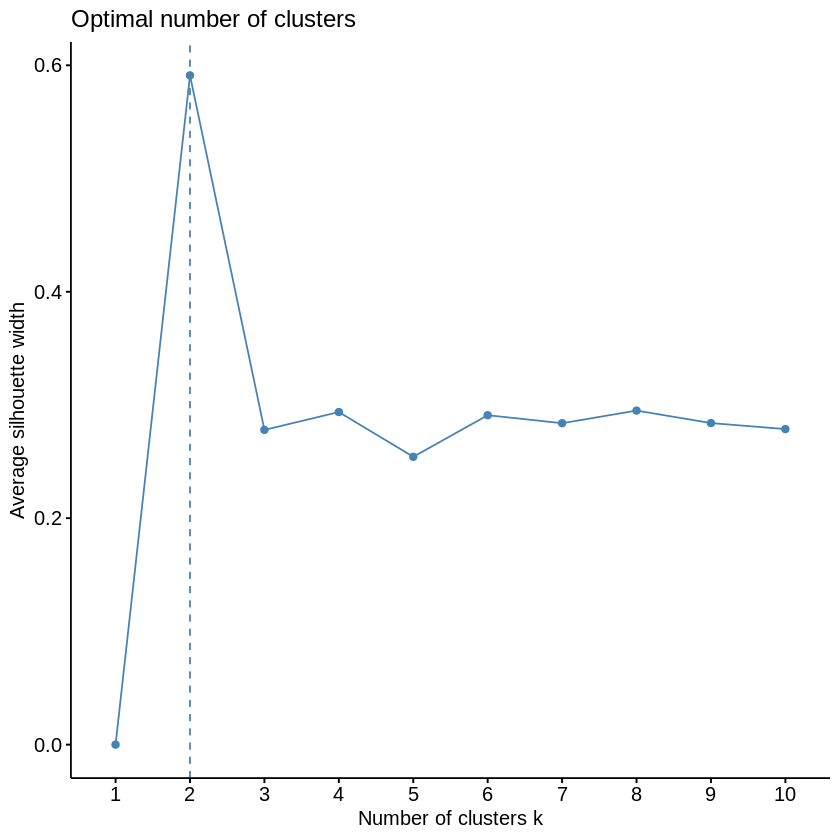

In [ ]:
factoextra::fviz_nbclust(scale(educationdata), hcut, method = "silhouette")  

Al realizar la estimacion se obtiene como resultado que el metodo óptimo es *silhouette*, ya que máximiza la media de los indices, permitiendo ver la asignacion de una observación en relación con las demas observaciones del cluster. 
De tal forma que cuatifica la asignación que se realizó en las observaciones del cluster.

*  WSS: es la suma de los cuadrados entre los clusters en el momento en que se presente un codo. 


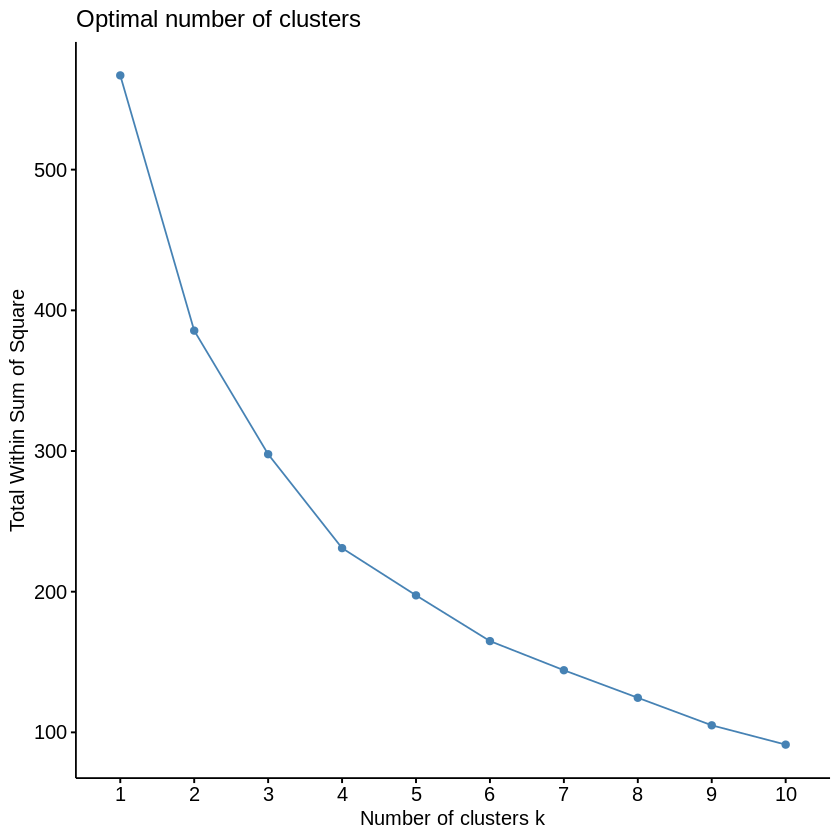

In [ ]:
factoextra::fviz_nbclust(scale(educationdata), hcut, method = "wss")

Por medio de la curva obtenida se puede observar una reducción en la suma total de cuadrados entre los clusters. Se utiliza el método *wss* en donde se puede evidenciar como a medida que se aumenta el número de clusters, el valor de la suma total va disminuyendo, de tal forma que la grafica va tomando una forma de codo.





*   GAP STAT: medir un óptimo entre el número de cluster y la distancia entre ellos. 



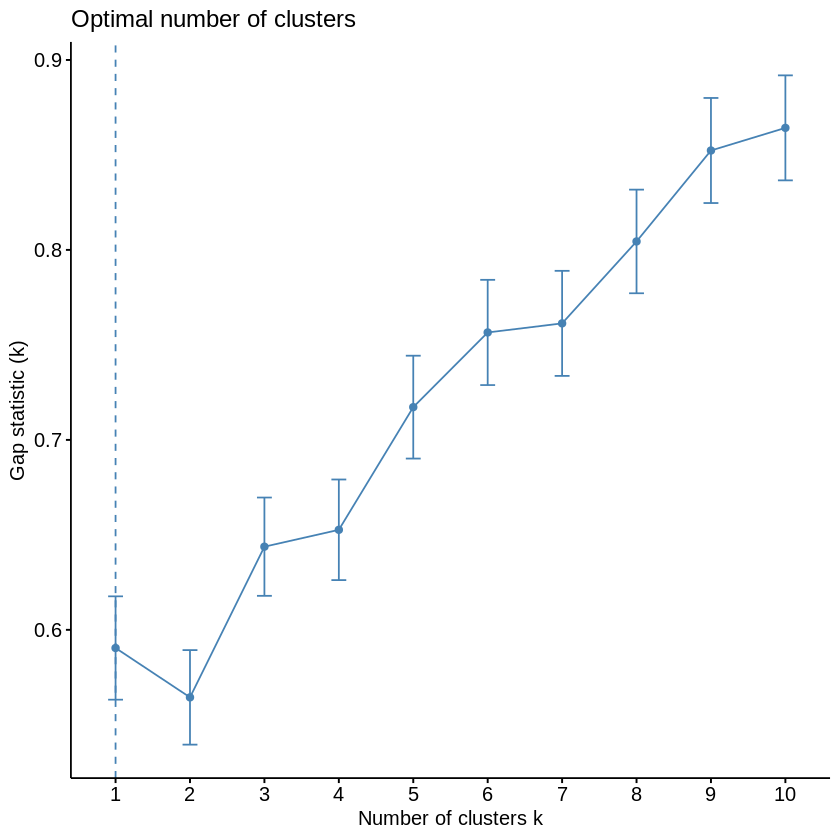

In [ ]:
factoextra::fviz_nbclust(scale(educationdata), hcut, method = "gap_stat")

Por medio de esta gráfica se utilizó el método gap stat, ya que nos permite identificar el número de clusters óptimos, encontrando el valor k con el que se podrá maximizar el número de clusters. "más alejada de una distribución aleatoria."

*   Elección del número de cluster 

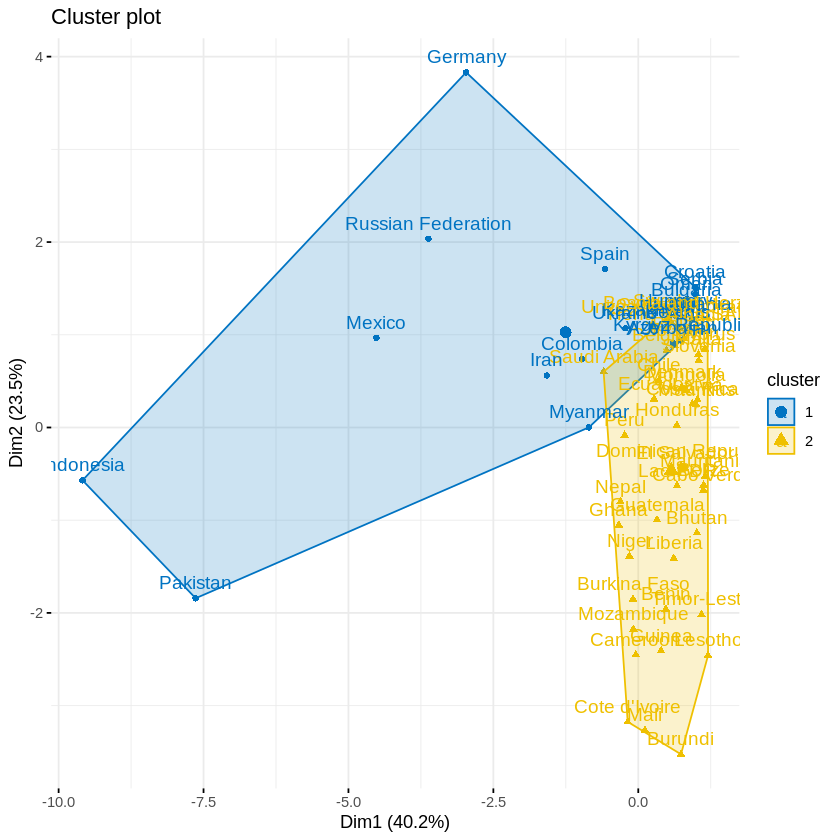

In [ ]:
set.seed(123)
km.res <- kmeans(scale(educationdata), 2, iter.max = 10000)
?kmeans
fviz_cluster(km.res, data = educationdata,
            ellipse.type = "convex",
            palette = "jco",
            ggtheme = theme_minimal()) 



Por medio de esta gráfica podemos evidenciar una agrupación de 2 clusters, con comportamientos similares, por ejemplo, el grupo1 agrupa países que son los que tienen los indicadores del número de habitantes más alto, también agrupa países que tienen un PIB representativo en comparación con los demás países analizados. Para el grupo dos, agrupa un mayor porcentaje de los países, en comparación con el grupo 1, abarcando un número significativo de países. 

In [ ]:
grupos = as.factor(km.res$cluster) ; print(grupos)

               Germany     Russian Federation                  Spain 
                     1                      1                      1 
                Mexico              Indonesia           Saudi Arabia 
                     1                      1                      2 
           Switzerland                 Sweden                Belgium 
                     2                      2                      2 
                  Iran   United Arab Emirates               Colombia 
                     1                      2                      1 
               Denmark                 Israel          Hong Kong SAR 
                     2                      2                      2 
               Finland                  Chile               Pakistan 
                     2                      2                      1 
            Kazakhstan                   Peru                Hungary 
                     1                      2                      1 
               Ukrai

In [ ]:
DF = as.data.frame(grupos);
DF

,grupos
,<fct>
Germany,1
Russian Federation,1
Spain,1
Mexico,1
Indonesia,1
Saudi Arabia,2
Switzerland,2
Sweden,2
Belgium,2


In [ ]:
DF$Country.Name = rownames(DF)

In [ ]:
DF[DF$grupos == '1', ]

,grupos,Country.Name
,<fct>,<chr>
Germany,1,Germany
Russian Federation,1,Russian Federation
Spain,1,Spain
Mexico,1,Mexico
Indonesia,1,Indonesia
Iran,1,Iran
Colombia,1,Colombia
Pakistan,1,Pakistan
Kazakhstan,1,Kazakhstan


In [ ]:
DF = as.data.frame(grupos)

In [ ]:
DF$Country.Name = rownames(DF)

In [ ]:
DF[DF2$grupos == '2', ]

,grupos,Country.Name
,<fct>,<chr>
Saudi Arabia,2,Saudi Arabia
Switzerland,2,Switzerland
Sweden,2,Sweden
Belgium,2,Belgium
United Arab Emirates,2,United Arab Emirates
Denmark,2,Denmark
Israel,2,Israel
Hong Kong SAR,2,Hong Kong SAR
Finland,2,Finland


In [ ]:
media_group = apply(educationdata, 2 , function(x) tapply(x, group, mean)) ; print(media_group)

  Population          GDP Repeaters.in.Primary Out.of.School
1   56933677 5.522210e+16             0.738500      450212.5
2   10378453 1.078343e+16             5.489545      179745.7
  Enrolment.in.Secondary Enrolment.in.Primary Unemployment
1              4490938.0              4908726     9.255000
2               809963.8              1357778     8.097727
  Life.Expectancy.at.Birth Duration.of.Primary.Education
1                 73.67350                      4.550000
2                 70.64591                      5.954545


In [ ]:
max_group = apply(educationdata, 2 , function(x) tapply(x, group, max)) ; print(max_group)


  Population         GDP Repeaters.in.Primary Out.of.School
1  254454778 3.87928e+17                 2.32       5611792
2   30973148 7.53832e+16                24.25       1233332
  Enrolment.in.Secondary Enrolment.in.Primary Unemployment
1               22586956             29838440         24.7
2                3419441              5669591         31.0
  Life.Expectancy.at.Birth Duration.of.Primary.Education
1                    83.08                             6
2                    83.98                             7


In [ ]:
min_group = apply(educationdata, 2 , function(x) tapply(x, group, min)) ; print(min_group)

  Population        GDP Repeaters.in.Primary Out.of.School
1    2932367 7468096567                    0           561
2     351706 1399000000                    0           397
  Enrolment.in.Secondary Enrolment.in.Primary Unemployment
1                 277349               108115          3.3
2                  30230                24072          1.0
  Life.Expectancy.at.Birth Duration.of.Primary.Education
1                    65.86                             4
2                    49.70                             5


**K-MEDOIDS**

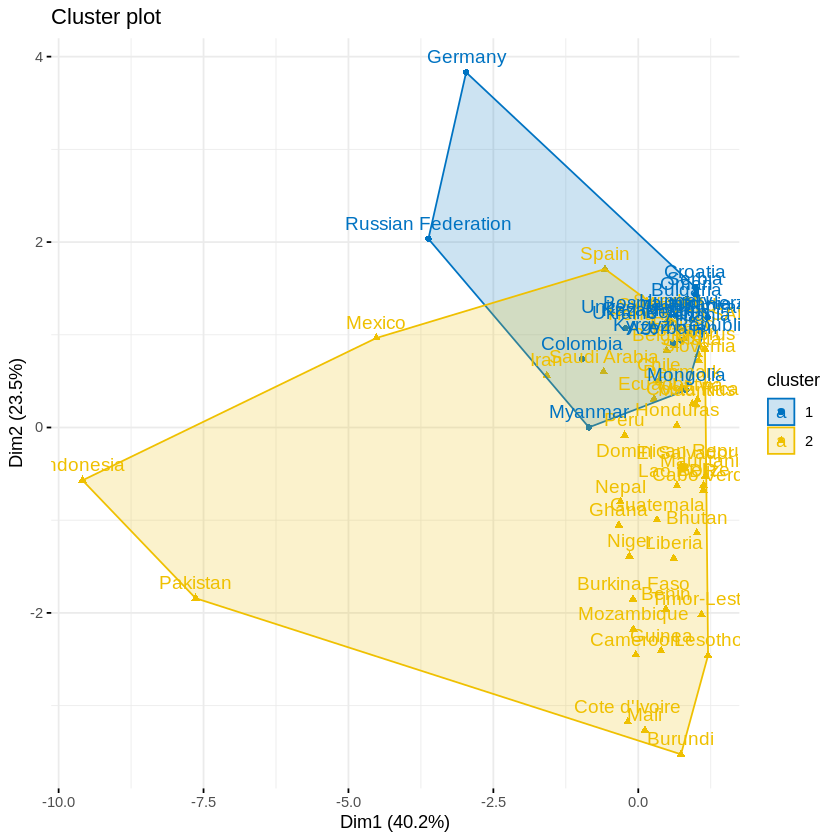

In [ ]:
set.seed(123)
kmed.res <- pam(scale(educationdata), 2)
fviz_cluster(kmed.res, data = educationdata, 
             ellipse.type = "convex", # c("t", "norm", "euclid") o "convex" o "confidence"
             palette = "jco",
             ggtheme = theme_minimal())

De igual forma en este método se agrupan las observaciones, con variables mas representativas, de igual forma se puede evidenciar una agrupación de 2 clusters, con comportamientos similares, el grupo1 agrupa menor cantidad de paísesen comparación con los demás países analizados, igualmente estos países cuentan con caracterisricas similares en cuanto a niveles de población y también indices del PIB .Para el grupo dos, agrupa un mayor porcentaje de los países, en comparación con el grupo 1, abarcando un mayor número de países en comparación con el grupo 1.

In [ ]:
grupo3 = as.factor(kmed.res$cluster) ; print(grupo3)

               Germany     Russian Federation                  Spain 
                     1                      1                      2 
                Mexico              Indonesia           Saudi Arabia 
                     2                      2                      2 
           Switzerland                 Sweden                Belgium 
                     2                      2                      2 
                  Iran   United Arab Emirates               Colombia 
                     2                      1                      1 
               Denmark                 Israel          Hong Kong SAR 
                     2                      2                      2 
               Finland                  Chile               Pakistan 
                     2                      2                      2 
            Kazakhstan                   Peru                Hungary 
                     1                      2                      1 
               Ukrai

In [ ]:
DF3 = as.data.frame(grupo3);
DF3

,grupo3
,<fct>
Germany,1
Russian Federation,1
Spain,2
Mexico,2
Indonesia,2
Saudi Arabia,2
Switzerland,2
Sweden,2
Belgium,2


In [ ]:
DF3$Country.Name = rownames(DF3)
DF3[DF3$grupo3 == '1', ]


,grupo3,Country.Name
,<fct>,<chr>
Germany,1,Germany
Russian Federation,1,Russian Federation
United Arab Emirates,1,United Arab Emirates
Colombia,1,Colombia
Kazakhstan,1,Kazakhstan
Hungary,1,Hungary
Ukraine,1,Ukraine
Oman,1,Oman
Belarus,1,Belarus


In [ ]:
DF3[DF3$grupo3 == '2', ]

,grupo3,Country.Name
,<fct>,<chr>
Spain,2,Spain
Mexico,2,Mexico
Indonesia,2,Indonesia
Saudi Arabia,2,Saudi Arabia
Switzerland,2,Switzerland
Sweden,2,Sweden
Belgium,2,Belgium
Iran,2,Iran
Denmark,2,Denmark


In [ ]:
media_group3 = apply(educationdata, 2 , function(x) tapply(x, grupo3, mean)) ; print(media_group3)

  Population          GDP Repeaters.in.Primary Out.of.School
1   24624807 3.792991e+16            0.3694737      52867.53
2   25054536 1.907210e+16            5.5397778     353523.91
  Enrolment.in.Secondary Enrolment.in.Primary Unemployment
1                1852436              1309539     9.668421
2                2005797              2956345     7.948889
  Life.Expectancy.at.Birth Duration.of.Primary.Education
1                 73.91053                      4.315789
2                 70.61311                      6.022222


In [ ]:
max_group3 = apply(educationdata, 2 , function(x) tapply(x, grupo3, max)) ; print(max_group3)

  Population         GDP Repeaters.in.Primary Out.of.School
1  143819569 3.87928e+17                 1.73        309168
2  254454778 1.38134e+17                24.25       5611792
  Enrolment.in.Secondary Enrolment.in.Primary Unemployment
1                9061324              5725528         27.9
2               22586956             29838440         31.0
  Life.Expectancy.at.Birth Duration.of.Primary.Education
1                    80.84                             5
2                    83.98                             7


In [ ]:
min_group3 = apply(educationdata, 2 , function(x) tapply(x, grupo3, min)) ; print(min_group3)

  Population        GDP Repeaters.in.Primary Out.of.School
1    2893654 7468096567                    0           561
2     351706 1399000000                    0           397
  Enrolment.in.Secondary Enrolment.in.Primary Unemployment
1                 277349               108115          3.3
2                  30230                24072          1.0
  Life.Expectancy.at.Birth Duration.of.Primary.Education
1                    65.86                             4
2                    49.70                             5
